# <font color=teal>Udacity Nanodegree Data Science Project - 1</font>

## <font color=teal>Data Science Blog</font>

In this project, we are going to pick up a dataset, pose three questions that are related to the data set and answer these questions by analyzing the data. In order to properly analyze the data, we first have to clean up the data set such that there are no missing values and we then use visualizations in order to analyze the data and answer the questions posed.  

We will be using the Stack Overflow Survey Data 2020 for this project. Since, we will be concentrating on only the responses from people who are developers, we shall be filtering out only the data where the column **MainBranch** value is only "I am a developer by profession". The data set can be downloaded from this [link](https://insights.stackoverflow.com/survey). We are using the file - **survey_results_public.csv** for the input data.

### <font color=teal>Questions</font>

1. What kind of employment determined the job satisfaction?
2. What is the mean compensation for different types of education level?
3. What is the mean compensation for different types of UndergradMajor?

### <font color=teal>Data Preparation</font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML

from matplotlib.colors import ListedColormap

import warnings
warnings.filterwarnings('ignore')

#Reading the complete dataset from the csv file
data = pd.read_csv("survey_results_public.csv")

In [5]:
#Filtering the data such that we get only responses from developers
dev_data = data[data['MainBranch'] == 'I am a developer by profession']

#Fill the NaN values in the JobSat column with the mode of the column and making it categorical
dev_data['JobSat'] = dev_data['JobSat'].fillna(dev_data['JobSat'].mode()[0])
dev_data['JobSat'] = pd.Categorical(dev_data['JobSat'], categories = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied',
                                                                      'Slightly satisfied', 'Very satisfied'], ordered=True)

#Fill the ComnvertedComp values with the mean compensation of the country 
dev_data = dev_data.dropna(subset=['Country'])
comp_per_country = dev_data.groupby(['Country'])['ConvertedComp'].mean()
dev_data['ConvertedComp'] = dev_data.apply(lambda x: comp_per_country[x['Country']] if pd.isnull(x['ConvertedComp']) else x['ConvertedComp'], axis = 1)

#Filter out the Employment types where job satisfaction is not applicable and fill NaN values in Employment with mode
dev_data['Employment'] = dev_data['Employment'].dropna()


The following data preparation was done in order to answer the posed questions - 

1. The data was filtered to get the responses only from developers
2. The missing values in **JobSat** column was filled with the mode of the column and was made categorical
3. The entries with missing values in **Country** column are first dropped as we use this column for calculating the mean compensation. The missing values in the **ConvertedComp** column are filled with mean compensation after grouping by the Country as the pay scale varies with the Country.
4. The responses with missing values in the Employment column are dropped.

### <font color=teal>Data Analysis</font>

#### <font color=teal>1. Employment with Job Satisfaction</font>

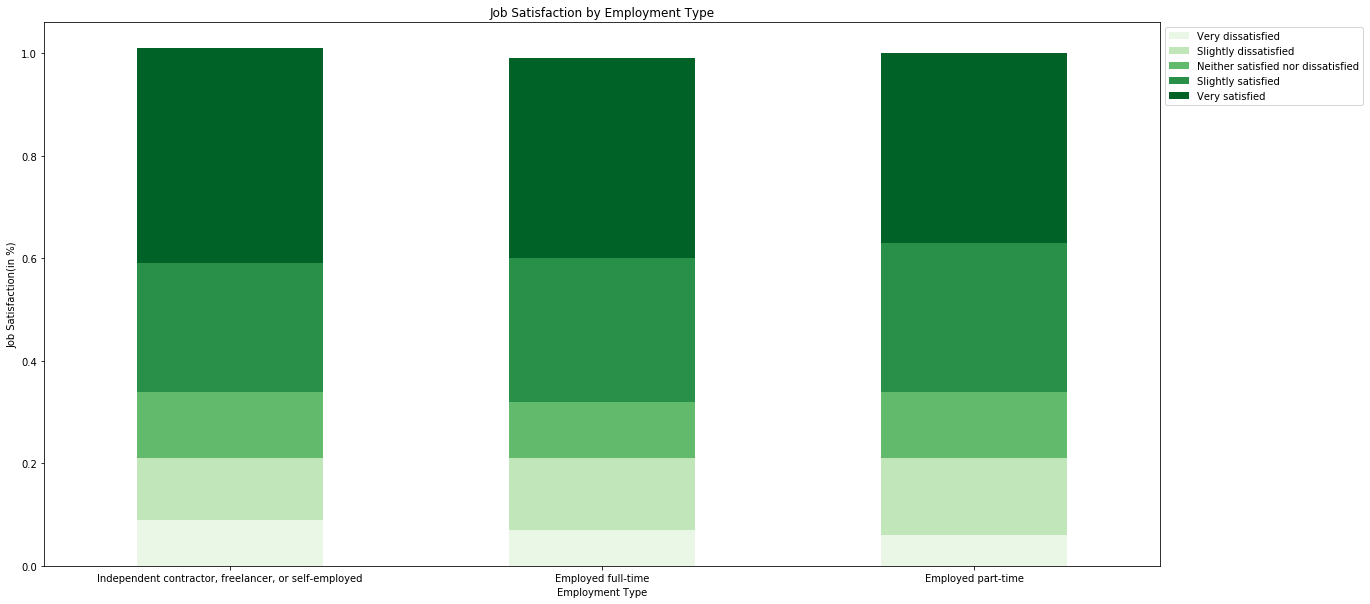

In [6]:
#Filtering out the employment types which are not applicable to the question posed
dev_data_jobsat = dev_data[dev_data['Employment'].isin(['Employed full-time', 'Employed part-time', 'Independent contractor, freelancer, or self-employed'])]

#Aggregating data by group by columns - Employment and JobSat
agg_data = dev_data_jobsat.groupby(['Employment', 'JobSat'], as_index = False)['Respondent'].count()

#Get the percentage of Job Satsifaction per Employmeny Type
respondents_per_country = dev_data_jobsat['Employment'].value_counts()
agg_data['JobSat Percentage'] = agg_data.apply(lambda x: x['Respondent'] / respondents_per_country[x['Employment']], axis = 1).round(2)

#Visualising the data
pivoted_data = pd.pivot_table(agg_data, values='JobSat Percentage', index='Employment', columns='JobSat') \
                 .sort_values('Very satisfied', ascending=False)

pivoted_data.plot(kind = 'bar', stacked = True, colormap = ListedColormap(sns.color_palette("Greens", 10)), figsize = (20,10))

plt.legend(loc = 'upper left', bbox_to_anchor = (1,1))
plt.xticks(rotation = 0)
plt.xlabel('Employment Type')
plt.ylabel('Job Satisfaction(in %)')
plt.title('Job Satisfaction by Employment Type')
plt.show()


In [7]:
display(pivoted_data)

JobSat,Very dissatisfied,Slightly dissatisfied,Neither satisfied nor dissatisfied,Slightly satisfied,Very satisfied
Employment,,,,,
"Independent contractor, freelancer, or self-employed",0.09,0.12,0.13,0.25,0.42
Employed full-time,0.07,0.14,0.11,0.28,0.39
Employed part-time,0.06,0.15,0.13,0.29,0.37


The data shows that **Independent contractors, freelancer or self employed respondents are the people with highest job satisfaction**.

#### <font color=teal>2. Compensation by Education Level</font>

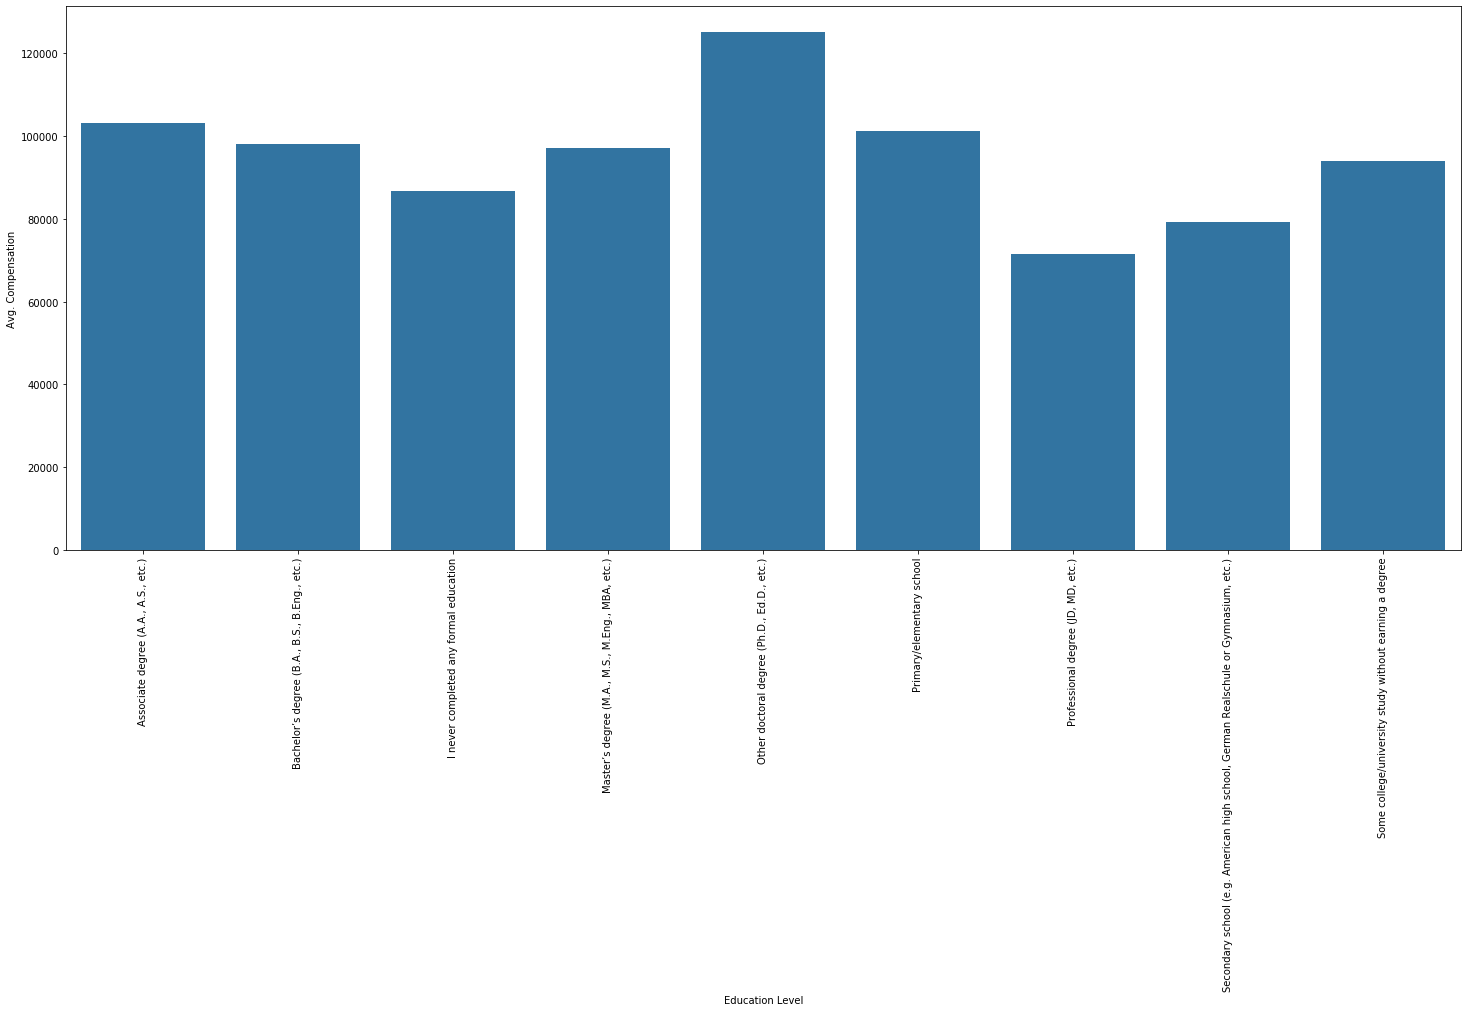

In [8]:
#Aggregating data by group by columns - Employment and JobSat
agg_data = dev_data.groupby(['EdLevel'], as_index = False)['ConvertedComp'].mean().round(0)

#Visualsing the data
plt.figure(figsize = (25,10))
g = sns.barplot(data = agg_data, x = 'EdLevel', y = 'ConvertedComp', color = 'C0')
g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation = 90)
g.axes.set_xlabel('Education Level')
g.axes.set_ylabel('Avg. Compensation')
plt.show()

In [9]:
display(agg_data.sort_values(by = ['ConvertedComp'], ascending = False))

,EdLevel,ConvertedComp
4,"Other doctoral degree (Ph.D., Ed.D., etc.)",125119.0
0,"Associate degree (A.A., A.S., etc.)",103114.0
5,Primary/elementary school,101133.0
1,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",98108.0
3,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",97026.0
8,Some college/university study without earning ...,93911.0
2,I never completed any formal education,86831.0
7,"Secondary school (e.g. American high school, G...",79207.0
6,"Professional degree (JD, MD, etc.)",71376.0


The data shows that people with an education level of **doctoral degree like Ph.D, Ed.D are the respondents with hgihest compensation followed by people with a Associate Degree**.

#### <font color=teal>3. Compensation by Undergraduate Major</font>

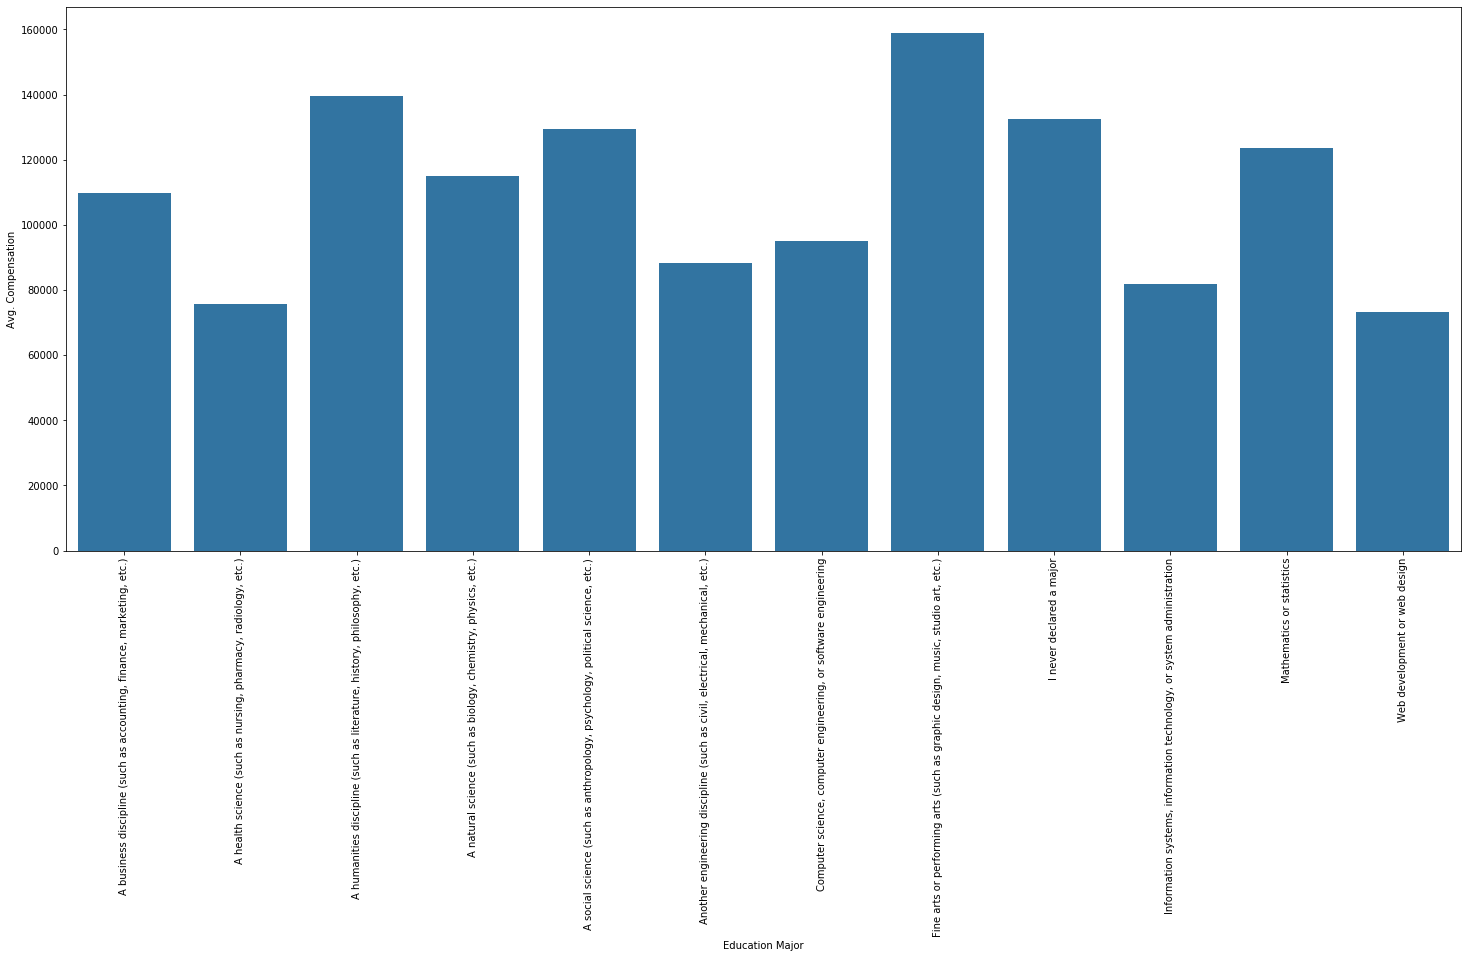

In [10]:
#Aggregating data by group by columns - Employment and JobSat
agg_data = dev_data.groupby(['UndergradMajor'], as_index = False)['ConvertedComp'].mean().round(0)

#Visualsing the data
plt.figure(figsize = (25,10))
g = sns.barplot(data = agg_data, x = 'UndergradMajor', y = 'ConvertedComp', color = 'C0')
g.axes.set_xticklabels(g.axes.get_xticklabels(), rotation = 90)
g.axes.set_xlabel('Education Major')
g.axes.set_ylabel('Avg. Compensation')
plt.show()

In [11]:
display(agg_data.sort_values(by = ['ConvertedComp'], ascending=False))

,UndergradMajor,ConvertedComp
7,Fine arts or performing arts (such as graphic ...,158966.0
2,"A humanities discipline (such as literature, h...",139578.0
8,I never declared a major,132449.0
4,"A social science (such as anthropology, psycho...",129331.0
10,Mathematics or statistics,123661.0
3,"A natural science (such as biology, chemistry,...",114949.0
0,"A business discipline (such as accounting, fin...",109894.0
6,"Computer science, computer engineering, or sof...",95003.0
5,"Another engineering discipline (such as civil,...",88418.0
9,"Information systems, information technology, o...",81957.0


The data shows that people with an Undergraduate Major of **Fine Arts or performing arts receive the highest compensation followed by people with a humanities discipline**.

### <font color=teal>Conclusions</font>

In this project, we did an analysis about the developers from Stack Overflow Survey Data 2020, and the following is a summary of the analysis - 

1. We measured the job satsifaction with respect to the various types of Employment types and found that people who are self employed or independent contractor or a free-lanced employee are the people with highest job satisfaction
2. We measured the average compensation with respect to the Education level and found that people with a doctoral degree are the people having highest compensation
3. We then looked at another factor, Undergraduate major that could determine the compensation and found that people with a degree in fine arts are having the highest compensation.